# Library


In [1]:
# pip install -r ../../requirements.txt 

In [2]:

# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [3]:
# Import library tambahan untuk EDA dan preprocessing
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import numpy as np
import torch
from collections import Counter


plt.style.use('default')
sns.set_palette("husl")



print("Library tambahan berhasil diimport!")

d:\Semester 6\Text Mining\UAS\tm-ner-legal-documents\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Library tambahan berhasil diimport!


In [4]:
print("Dependencies check:")

try:
    import transformers
    print(f"transformers: {transformers.__version__}")
except ImportError:
    print("transformers not installed")

try:
    import torch
    print(f"torch: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
except ImportError:
    print("❌ torch not installed")

try:
    import datasets
    print(f"datasets: {datasets.__version__}")
except ImportError:
    print("datasets not installed")

try:
    import evaluate
    print(f"evaluate: {evaluate.__version__}")
except ImportError:
    print("evaluate not installed")

Dependencies check:
transformers: 4.52.4
torch: 2.5.1+cu121
CUDA available: True
datasets: 3.6.0
evaluate: 0.4.3


---


# EDA


In [5]:


with open('../../Datasets/PUBLIC/data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

In [6]:
df

verdict  indictment  lawyer    id  owner  \
0    guilty    subsider   False  2743  agree   
1    guilty  alternatif   False  2744  agree   
2    guilty     tunggal   False  2745  agree   
3    guilty          NA   False  2746  agree   
4    guilty     tunggal   False  2747  agree   
..      ...         ...     ...   ...    ...   
988  guilty     tunggal   False  2738  jafar   
989  guilty     tunggal   False  2739  jafar   
990  guilty          NA   False  2740  jafar   
991  guilty  alternatif   False  2741  jafar   
992  guilty     tunggal   False  2742  jafar   

                                             text-tags  \
0    [O, O, B-Nomor Putusan, I-Nomor Putusan, O, O,...   
1    [O, O, B-Nomor Putusan, I-Nomor Putusan, O, O,...   
2    [O, O, B-Nomor Putusan, O, O, O, O, O, O, O, B...   
3    [O, O, O, B-Nomor Putusan, O, O, O, O, O, O, O...   
4    [O, O, B-Nomor Putusan, I-Nomor Putusan, O, O,...   
..                                                 ...   
988  [O, O, O, B-Nomor Putusan, I-Nomor Putusan, I-...   
989  [O, O, O, O, O, O, O, O, O, B-Nomor Putusan, O...   
990  [O, O, O, B-Nomor Putusan, O, O, O, O, O, O, O...   
991  [O, O, O, B-Nomor Putusan, O, O, O, O, O, O, O...   
992  [O, O, O, B-Nomor Putusan, O, O, O, O, O, O, O...   

                                                  text  
0    [﻿putusan, nomor, 325/pid.b/2015/pn, bwi, demi...  
1    [﻿putusan, nomor, 285/pid.b/2016/pn, sda, demi...  
2    [﻿putusan, nomor:, 80/pid.b/2014/pn.spg, demi,...  
3    [﻿putusan, nomor, :, 325/pid.sus/2012/pn.ta., ...  
4    [﻿putusan, nomor, 92/pid.b/2015/pn, slw., demi...  
..                                                 ...  
988  [﻿1, putusan, no., 21/pid., b/2012/pn., tmg, “...  
989  [﻿dir1ektori, putusan, mahkamah, agung, republ...  
990  [﻿putusan, nomor, :, 376/pid.b/2012/pn.kdi, de...  
991  [﻿putusan, nomor, :, 79/pid.sus/2015/pn.blb, d...  
992  [﻿putusan, nomor, :, 121/pid.b/2010/pn.smp, de...  

[993 rows x 7 columns]

In [7]:

print(f"Shape DataFrame: {df.shape}")
print(f"\nColumns DataFrame:")
print(df.columns.tolist())
print(f"\nInfo DataFrame:")
print(df.info())


Shape DataFrame: (993, 7)

Columns DataFrame:
['verdict', 'indictment', 'lawyer', 'id', 'owner', 'text-tags', 'text']

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   verdict     993 non-null    object
 1   indictment  993 non-null    object
 2   lawyer      993 non-null    bool  
 3   id          993 non-null    int64 
 4   owner       993 non-null    object
 5   text-tags   993 non-null    object
 6   text        993 non-null    object
dtypes: bool(1), int64(1), object(5)
memory usage: 47.6+ KB
None


In [8]:
# Fungsi untuk mengekstrak semua tags unik
def get_all_tags(df):
    all_tags = []
    for tags in df['text-tags']:
        all_tags.extend(tags)
    return Counter(all_tags)

# Dapatkan distribusi tags
tag_counts = get_all_tags(df)
print("Distribusi Tags NER:")
for tag, count in tag_counts.most_common():
    print(f"{tag}: {count:,}")

# Hitung persentase non-O tags
total_tags = sum(tag_counts.values())
non_o_tags = sum(count for tag, count in tag_counts.items() if tag != 'O')
print(f"\nTotal tags: {total_tags:,}")
print(f"Non-O tags: {non_o_tags:,} ({non_o_tags/total_tags*100:.2f}%)")
print(f"O tags: {tag_counts['O']:,} ({tag_counts['O']/total_tags*100:.2f}%)")

Distribusi Tags NER:
O: 5,769,685
I-Melanggar UU (Dakwaan): 12,798
I-Melanggar UU (Pertimbangan Hukum): 11,712
I-Putusan Hukuman: 10,444
I-Tuntutan Hukuman: 8,662
I-Melanggar UU (Tuntutan): 8,467
I-Nama Saksi: 8,446
I-Jenis Perkara: 8,400
I-Nama Hakim Anggota: 4,943
I-Nama Terdakwa: 4,182
B-Nama Saksi: 3,948
I-Jenis Amar: 3,254
I-Tanggal Kejadian: 3,228
I-Nama Hakim Ketua: 2,521
I-Nama Pengadilan: 2,255
I-Nama Jaksa: 2,048
I-Tanggal Putusan: 2,000
B-Nama Hakim Anggota: 1,944
I-Jenis Dakwaan: 1,833
I-Nama Panitera: 1,659
B-Tanggal Kejadian: 1,635
B-Melanggar UU (Dakwaan): 1,368
B-Melanggar UU (Pertimbangan Hukum): 1,332
B-Nama Terdakwa: 1,236
B-Tuntutan Hukuman: 1,201
B-Putusan Hukuman: 1,173
I-Tingkat Kasus: 1,122
B-Nomor Putusan: 993
B-Nama Pengadilan: 993
B-Nama Hakim Ketua: 990
B-Nama Panitera: 990
B-Jenis Amar: 989
B-Tanggal Putusan: 987
B-Nama Jaksa: 979
B-Tingkat Kasus: 975
B-Melanggar UU (Tuntutan): 951
B-Jenis Perkara: 950
B-Jenis Dakwaan: 869
I-Nomor Putusan: 816
I-Nama Pengac

In [9]:
# Analisis jenis entity yang ada
def analyze_entity_types(df):

    entity_types = set()
    entity_examples = {}
    
    for idx in range(len(df)):
        text = df.iloc[idx]['text']
        tags = df.iloc[idx]['text-tags']
        
        current_entity = []
        current_entity_type = None
        
        for token, tag in zip(text, tags):
            if tag.startswith('B-'):
                # Simpan entity sebelumnya
                if current_entity and current_entity_type:
                    entity_text = ' '.join(current_entity)
                    if current_entity_type not in entity_examples:
                        entity_examples[current_entity_type] = []
                    if len(entity_examples[current_entity_type]) < 5:  # Simpan max 5 contoh
                        entity_examples[current_entity_type].append(entity_text)
                
                # Mulai entity baru
                current_entity_type = tag[2:]
                entity_types.add(current_entity_type)
                current_entity = [token]
            
            elif tag.startswith('I-') and current_entity_type == tag[2:]:
                current_entity.append(token)
            
            else:  # tag == 'O' atau inconsistent I-tag
                # Simpan entity yang sedang diproses
                if current_entity and current_entity_type:
                    entity_text = ' '.join(current_entity)
                    if current_entity_type not in entity_examples:
                        entity_examples[current_entity_type] = []
                    if len(entity_examples[current_entity_type]) < 5:
                        entity_examples[current_entity_type].append(entity_text)
                
                current_entity = []
                current_entity_type = None
        
        # Handle entity di akhir sequence
        if current_entity and current_entity_type:
            entity_text = ' '.join(current_entity)
            if current_entity_type not in entity_examples:
                entity_examples[current_entity_type] = []
            if len(entity_examples[current_entity_type]) < 5:
                entity_examples[current_entity_type].append(entity_text)
    
    return entity_types, entity_examples

# Analisis entity types
print("Menganalisis jenis-jenis entity...")
entity_types, entity_examples = analyze_entity_types(df)

print(f"\nDitemukan {len(entity_types)} jenis entity:")
for entity_type in sorted(entity_types):
    print(f"\n• {entity_type}:")
    if entity_type in entity_examples:
        for example in entity_examples[entity_type]:
            print(f"  - '{example}'")
    else:
        print(f"  - (tidak ada contoh)")

Menganalisis jenis-jenis entity...

Ditemukan 20 jenis entity:

• Jenis Amar:
  - 'menjatuhkan pidana kepada terdakwa'
  - 'menjatuhkan pidana kepada terdakwa'
  - 'menjatuhkan pidana terhadap terdakwa'
  - 'menjatuhkan pidana terhadap terdakwa'
  - 'menjatuhkan pidana kepada terdakwa'

• Jenis Dakwaan:
  - 'dakwaan alternatif-subsidairitas'
  - 'dakwaan oleh penuntut umum yang dibuat secara alternatif,'
  - 'dakwaan tunggal'
  - 'dakwaan tunggal'
  - 'dakwaan alternatif'

• Jenis Perkara:
  - '“penggelapan dengan pemberatan”'
  - '“pengelapan dalam jabatan”'
  - 'penganiayaan;'
  - '“dengan sengaja menyeienggarakan kegiatan atau proses produksi, penyimpanan, pengangkutan dan atau peredaran pangan dalam keadaan yang tidak memenuhi persyaratan sanitasi,"'
  - '“pencurian dengan pemberatan”'

• Melanggar UU (Dakwaan):
  - '374 kuhp,'
  - '372 kuhp,'
  - '362 kuhp;'
  - 'pasal 374 kuhp'
  - 'pasal 372 kuhp'

• Melanggar UU (Pertimbangan Hukum):
  - 'pasal 374 kuhp'
  - 'pasal 374 kuhp'
  

In [10]:

def check_annotation_consistency(df):
    """
    Mengecek konsistensi anotasi BIO
    """
    errors = []
    
    for idx in range(len(df)):
        tags = df.iloc[idx]['text-tags']
        text = df.iloc[idx]['text']
        
        for i, tag in enumerate(tags):
            # Check 1: I-tag harus didahului oleh B-tag atau I-tag dengan tipe yang sama
            if tag.startswith('I-'):
                entity_type = tag[2:]
                if i == 0:  # I-tag di awal sequence
                    errors.append({
                        'doc_id': idx,
                        'position': i,
                        'error': f'I-tag at beginning: {tag}',
                        'context': ' '.join(text[max(0, i-2):i+3])
                    })
                else:
                    prev_tag = tags[i-1]
                    if not (prev_tag == f'B-{entity_type}' or prev_tag == f'I-{entity_type}'):
                        errors.append({
                            'doc_id': idx,
                            'position': i,
                            'error': f'I-tag without proper B-tag: {prev_tag} -> {tag}',
                            'context': ' '.join(text[max(0, i-2):i+3])
                        })
    
    return errors

# Cek konsistensi anotasi
print("Mengecek konsistensi anotasi BIO...")
errors = check_annotation_consistency(df)

if errors:
    print(f"\nDitemukan {len(errors)} error konsistensi:")
    for i, error in enumerate(errors[:10]):  # Tampilkan 10 error pertama
        print(f"{i+1}. Doc {error['doc_id']}, Pos {error['position']}: {error['error']}")
        print(f"   Context: '{error['context']}'")
    
    if len(errors) > 10:
        print(f"\n... dan {len(errors)-10} error lainnya")
else:
    print("\nTidak ditemukan error konsistensi BIO!")

Mengecek konsistensi anotasi BIO...

Ditemukan 1 error konsistensi:
1. Doc 411, Pos 8253: I-tag without proper B-tag: I-Nama Panitera -> I-Nama Jaksa
   Context: 'asep pulah m, sh., panitera'


In [11]:
# Fungsi untuk menampilkan anotasi secara visual
def display_annotations(df, idx, max_tokens=50):
    """
    Menampilkan teks dengan highlight anotasi untuk review manual
    """
    text = df.iloc[idx]['text']
    tags = df.iloc[idx]['text-tags']
    
    print(f"\n=== DOCUMENT {idx} (ID: {df.iloc[idx]['id']}) ===")
    print(f"Verdict: {df.iloc[idx]['verdict']}")
    print(f"Indictment: {df.iloc[idx]['indictment']}")
    print(f"Lawyer: {df.iloc[idx]['lawyer']}")
    print(f"Owner: {df.iloc[idx]['owner']}")
    print("\n--- ANNOTATED TEXT ---")
    
    # Batasi jumlah token untuk display
    display_text = text[:max_tokens]
    display_tags = tags[:max_tokens]
    
    current_entity = []
    current_entity_type = None
    
    for i, (token, tag) in enumerate(zip(display_text, display_tags)):
        if tag.startswith('B-'):
            # Selesaikan entity sebelumnya jika ada
            if current_entity:
                entity_text = ' '.join(current_entity)
                print(f"[{entity_text}]({current_entity_type})", end=' ')
                current_entity = []
            
            # Mulai entity baru
            current_entity_type = tag[2:]
            current_entity = [token]
        
        elif tag.startswith('I-'):
            # Lanjutkan entity yang sama
            if current_entity_type == tag[2:]:
                current_entity.append(token)
            else:
                # Tag inconsistent, print as separate
                if current_entity:
                    entity_text = ' '.join(current_entity)
                    print(f"[{entity_text}]({current_entity_type})", end=' ')
                current_entity_type = tag[2:]
                current_entity = [token]
        
        else:  # tag == 'O'
            # Selesaikan entity sebelumnya jika ada
            if current_entity:
                entity_text = ' '.join(current_entity)
                print(f"[{entity_text}]({current_entity_type})", end=' ')
                current_entity = []
                current_entity_type = None
            
            # Print token biasa
            print(token, end=' ')
    
    # Selesaikan entity terakhir jika ada
    if current_entity:
        entity_text = ' '.join(current_entity)
        print(f"[{entity_text}]({current_entity_type})", end=' ')
    
    print("\n")
    
    # Tampilkan semua entities yang ditemukan
    entities = []
    current_entity = []
    current_entity_type = None
    
    for token, tag in zip(text, tags):
        if tag.startswith('B-'):
            if current_entity:
                entities.append((' '.join(current_entity), current_entity_type))
                current_entity = []
            current_entity_type = tag[2:]
            current_entity = [token]
        elif tag.startswith('I-') and current_entity_type == tag[2:]:
            current_entity.append(token)
        else:
            if current_entity:
                entities.append((' '.join(current_entity), current_entity_type))
                current_entity = []
                current_entity_type = None
    
    if current_entity:
        entities.append((' '.join(current_entity), current_entity_type))
    
    if entities:
        print("--- EXTRACTED ENTITIES ---")
        for entity, entity_type in entities:
            print(f"• {entity_type}: '{entity}'")
    else:
        print("--- NO ENTITIES FOUND ---")
    
    print("\n" + "="*50)

# Tampilkan beberapa contoh dokumen dengan anotasi
print("MANUAL REVIEW - Contoh Anotasi:")
for i in range(min(5, len(df))):
    display_annotations(df, i, max_tokens=30)

MANUAL REVIEW - Contoh Anotasi:

=== DOCUMENT 0 (ID: 2743) ===
Verdict: guilty
Indictment: subsider
Lawyer: False
Owner: agree

--- ANNOTATED TEXT ---
﻿putusan nomor [325/pid.b/2015/pn bwi](Nomor Putusan) demi keadilan berdasarkan ketuhanan yang maha esa [pengadilan negeri banyuwangi](Nama Pengadilan) yang mengadili dan memutus perkara pidana dengan acara pemeriksaan biasa dalam [tingkat pertama](Tingkat Kasus) menjatuhkan putusan sebagai 

--- EXTRACTED ENTITIES ---
• Nomor Putusan: '325/pid.b/2015/pn bwi'
• Nama Pengadilan: 'pengadilan negeri banyuwangi'
• Tingkat Kasus: 'tingkat pertama'
• Nama Terdakwa: 'suyanto al. yanto;'
• Jenis Perkara: '“penggelapan dengan pemberatan”'
• Melanggar UU (Tuntutan): 'pasal 374 kuhpidana'
• Tuntutan Hukuman: 'penjara selama 1(satu) tahun 4(empat)'
• Nama Saksi: 'slamet sugianto,'
• Nama Saksi: 'supron,'
• Nama Saksi: 'suyadi,'
• Tanggal Kejadian: '14 maret 2015'
• Jenis Dakwaan: 'dakwaan alternatif-subsidairitas'
• Melanggar UU (Dakwaan): '374 kuhp

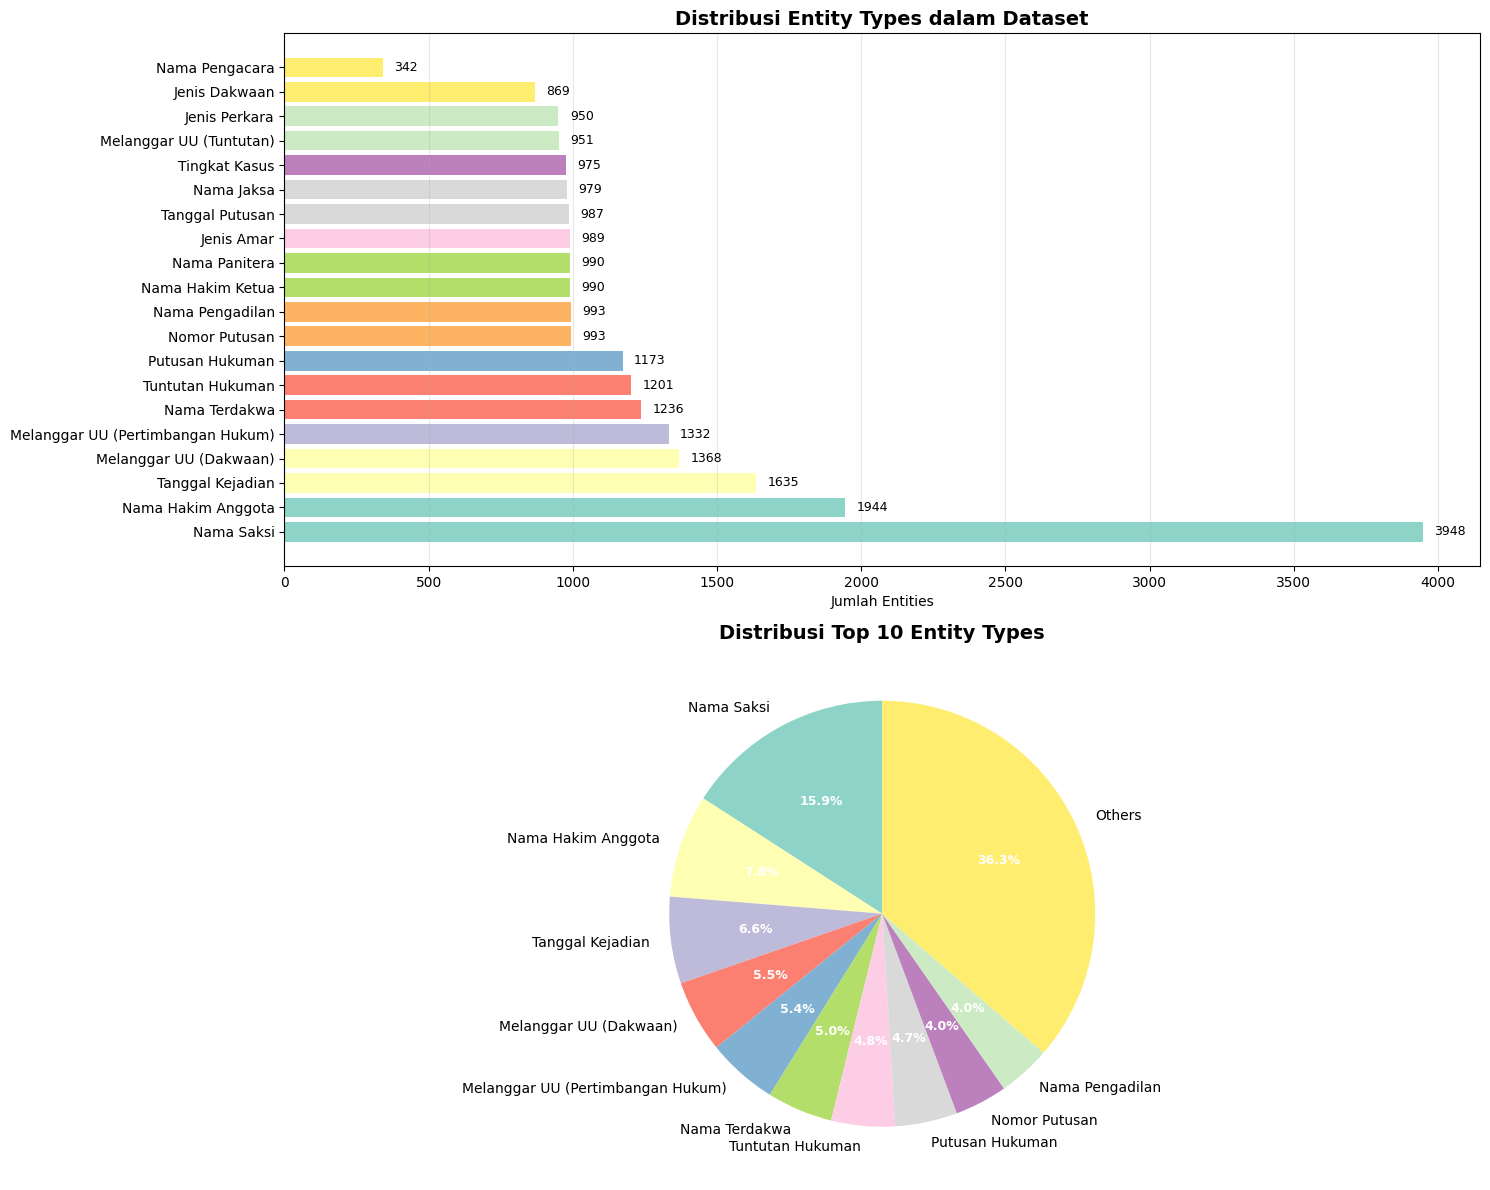


Total unique entity types: 20
Total entities found: 24845


In [12]:
# Visualisasi distribusi entity types
def visualize_entity_distribution(df):
    """
    Membuat visualisasi distribusi entity types
    """
    # Hitung jumlah entities per type
    entity_counts = {}
    
    for idx in range(len(df)):
        text = df.iloc[idx]['text']
        tags = df.iloc[idx]['text-tags']
        
        current_entity_type = None
        
        for token, tag in zip(text, tags):
            if tag.startswith('B-'):
                entity_type = tag[2:]
                if entity_type not in entity_counts:
                    entity_counts[entity_type] = 0
                entity_counts[entity_type] += 1
                current_entity_type = entity_type
    
    # Sort dan buat plot
    sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Horizontal bar chart untuk semua entities
    entity_names = [item[0] for item in sorted_entities]
    entity_values = [item[1] for item in sorted_entities]
    
    bars = ax1.barh(range(len(entity_names)), entity_values, color=plt.cm.Set3(np.linspace(0, 1, len(entity_names))))
    ax1.set_yticks(range(len(entity_names)))
    ax1.set_yticklabels(entity_names, fontsize=10)
    ax1.set_xlabel('Jumlah Entities')
    ax1.set_title('Distribusi Entity Types dalam Dataset', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Tambahkan nilai di ujung bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width + max(entity_values)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center', fontsize=9)
    
    # Plot 2: Pie chart untuk top 10 entities
    top_10 = sorted_entities[:10]
    others_count = sum([item[1] for item in sorted_entities[10:]])
    
    pie_labels = [item[0] for item in top_10]
    pie_values = [item[1] for item in top_10]
    
    if others_count > 0:
        pie_labels.append('Others')
        pie_values.append(others_count)
    
    wedges, texts, autotexts = ax2.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', 
                                       startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(pie_values))))
    ax2.set_title('Distribusi Top 10 Entity Types', fontsize=14, fontweight='bold')
    
    # Rotate labels for better readability
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('white')
        autotext.set_weight('bold')
    
    plt.tight_layout()
    plt.show()
    
    return entity_counts


entity_counts = visualize_entity_distribution(df)
print(f"\nTotal unique entity types: {len(entity_counts)}")
print(f"Total entities found: {sum(entity_counts.values())}")

---


# Preprocessing


In [13]:
# Load pembagian dataset berdasarkan ID dari folder PUBLIC
print("Loading dataset splits from PUBLIC folder...")

# Load train IDs
train_ids = pd.read_csv('../../Datasets/PUBLIC/train.ids.csv', header=None, names=['id'])
print(f"Train IDs loaded: {len(train_ids)} documents")

# Load validation IDs  
val_ids = pd.read_csv('../../Datasets/PUBLIC/val.ids.csv', header=None, names=['id'])
print(f"Validation IDs loaded: {len(val_ids)} documents")

# Load test IDs
test_ids = pd.read_csv('../../Datasets/PUBLIC/test.ids.csv', header=None, names=['id'])
print(f"Test IDs loaded: {len(test_ids)} documents")

# Konversi ke set untuk lookup yang lebih cepat
train_ids_set = set(train_ids['id'].tolist())
val_ids_set = set(val_ids['id'].tolist())
test_ids_set = set(test_ids['id'].tolist())

print(f"\nDataset split summary:")
print(f"Train: {len(train_ids_set)} documents")
print(f"Validation: {len(val_ids_set)} documents")
print(f"Test: {len(test_ids_set)} documents")
print(f"Total: {len(train_ids_set) + len(val_ids_set) + len(test_ids_set)} documents")

# Verifikasi tidak ada overlap
overlap_train_val = train_ids_set.intersection(val_ids_set)
overlap_train_test = train_ids_set.intersection(test_ids_set)
overlap_val_test = val_ids_set.intersection(test_ids_set)

print(f"\nOverlap check:")
print(f"Train-Val overlap: {len(overlap_train_val)} documents")
print(f"Train-Test overlap: {len(overlap_train_test)} documents")
print(f"Val-Test overlap: {len(overlap_val_test)} documents")



Loading dataset splits from PUBLIC folder...
Train IDs loaded: 695 documents
Validation IDs loaded: 30 documents
Test IDs loaded: 268 documents

Dataset split summary:
Train: 695 documents
Validation: 30 documents
Test: 268 documents
Total: 993 documents

Overlap check:
Train-Val overlap: 0 documents
Train-Test overlap: 0 documents
Val-Test overlap: 0 documents


In [14]:
# Split dataframe berdasarkan ID yang sudah ditentukan
print("Splitting dataframe based on predefined IDs...")

# Filter dataframe berdasarkan ID
train_df = df[df['id'].isin(train_ids_set)].copy().reset_index(drop=True)
val_df = df[df['id'].isin(val_ids_set)].copy().reset_index(drop=True)
test_df = df[df['id'].isin(test_ids_set)].copy().reset_index(drop=True)

print(f"\nDataFrame splits created:")
print(f"Train DataFrame: {len(train_df)} documents")
print(f"Validation DataFrame: {len(val_df)} documents")
print(f"Test DataFrame: {len(test_df)} documents")

# Verifikasi bahwa semua dokumen dari main dataframe sudah terbagi
total_split = len(train_df) + len(val_df) + len(test_df)
print(f"\nOriginal dataset: {len(df)} documents")
print(f"Split total: {total_split} documents")

if total_split == len(df):
    print("All documents successfully assigned to splits!")
else:
    missing = len(df) - total_split
    print(f"{missing} documents are missing from splits")
    
    # Cari dokumen yang tidak ada di splits
    all_split_ids = train_ids_set.union(val_ids_set).union(test_ids_set)
    original_ids = set(df['id'].tolist())
    missing_ids = original_ids - all_split_ids
    if missing_ids:
        print(f"Missing IDs: {list(missing_ids)[:10]}...")  # Show first 10

# Cek distribusi verdict di setiap split
print(f"\nVerdict distribution per split:")
print(f"\nTrain verdict distribution:")
print(train_df['verdict'].value_counts(normalize=True).round(3))

print(f"\nValidation verdict distribution:")
print(val_df['verdict'].value_counts(normalize=True).round(3))

print(f"\nTest verdict distribution:")
print(test_df['verdict'].value_counts(normalize=True).round(3))

Splitting dataframe based on predefined IDs...

DataFrame splits created:
Train DataFrame: 695 documents
Validation DataFrame: 30 documents
Test DataFrame: 268 documents

Original dataset: 993 documents
Split total: 993 documents
All documents successfully assigned to splits!

Verdict distribution per split:

Train verdict distribution:
verdict
guilty    0.957
bebas     0.026
lepas     0.017
Name: proportion, dtype: float64

Validation verdict distribution:
verdict
guilty    1.0
Name: proportion, dtype: float64

Test verdict distribution:
verdict
guilty    0.940
bebas     0.034
lepas     0.026
Name: proportion, dtype: float64


In [15]:
# Setup XLM-RoBERTa tokenizer untuk NER
print("Setting up XLM-RoBERTa tokenizer...")

# Load tokenizer XLM-RoBERTa
model_name = "xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

print(f"Loaded tokenizer: {model_name}")
print(f"Vocab size: {tokenizer.vocab_size}")
print(f"Special tokens: {tokenizer.special_tokens_map}")
print(f"CLS token: '{tokenizer.cls_token}' (ID: {tokenizer.cls_token_id})")
print(f"SEP token: '{tokenizer.sep_token}' (ID: {tokenizer.sep_token_id})")
print(f"PAD token: '{tokenizer.pad_token}' (ID: {tokenizer.pad_token_id})")
print(f"UNK token: '{tokenizer.unk_token}' (ID: {tokenizer.unk_token_id})")

Setting up XLM-RoBERTa tokenizer...
Loaded tokenizer: xlm-roberta-large
Vocab size: 250002
Special tokens: {'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}
CLS token: '<s>' (ID: 0)
SEP token: '</s>' (ID: 2)
PAD token: '<pad>' (ID: 1)
UNK token: '<unk>' (ID: 3)


In [16]:
# Test tokenisasi pada contoh kecil
sample_tokens = df.iloc[0]['text'][:10]  # First 10 tokens
print(f"\n Testing tokenization on sample:")
print(f"Original tokens: {sample_tokens}")


 Testing tokenization on sample:
Original tokens: ['\ufeffputusan', 'nomor', '325/pid.b/2015/pn', 'bwi', 'demi', 'keadilan', 'berdasarkan', 'ketuhanan', 'yang', 'maha']


In [17]:


# Tokenize dengan berbagai parameter
test_encoding = tokenizer(
    sample_tokens,
    is_split_into_words=True,
    add_special_tokens=True,
    return_offsets_mapping=True,
    return_attention_mask=True
)

print(f"\nTokenization result:")
print(f"Input IDs: {test_encoding['input_ids']}")
print(f"Tokens: {tokenizer.convert_ids_to_tokens(test_encoding['input_ids'])}")
print(f"Word IDs: {test_encoding.word_ids()}")
print(f"Attention mask: {test_encoding['attention_mask']}")


Tokenization result:
Input IDs: [0, 101485, 66, 71161, 112467, 64, 45226, 5, 275, 24301, 64, 254, 19, 90998, 14, 41000, 186678, 33788, 120855, 66150, 119, 13490, 2]
Tokens: ['<s>', '▁putus', 'an', '▁nomor', '▁325', '/', 'pid', '.', 'b', '/2015', '/', 'p', 'n', '▁bw', 'i', '▁demi', '▁keadilan', '▁berdasarkan', '▁ketu', 'hanan', '▁yang', '▁maha', '</s>']
Word IDs: [None, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, None]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
# Buat mapping label NER ke ID numerik
print("Creating label mapping for NER...")

def create_label_mapping(df):
    """
    Membuat mapping dari label NER ke ID numerik
    """
    all_labels = set()
    
    # Kumpulkan semua unique labels
    for tags in df['text-tags']:
        all_labels.update(tags)
    
    # Sort labels untuk konsistensi (O akan di index 0)
    sorted_labels = sorted(list(all_labels))
    
    # Pastikan 'O' di index 0 untuk konsistensi
    if 'O' in sorted_labels:
        sorted_labels.remove('O')
        sorted_labels = ['O'] + sorted_labels
    
    # Buat mapping
    label2id = {label: idx for idx, label in enumerate(sorted_labels)}
    id2label = {idx: label for label, idx in label2id.items()}
    
    return label2id, id2label, sorted_labels

# Create mappings
label2id, id2label, all_labels = create_label_mapping(df)

print(f"\nLabel mapping created:")
print(f"Total unique labels: {len(all_labels)}")
print(f"Label 'O' has ID: {label2id['O']}")

Creating label mapping for NER...

Label mapping created:
Total unique labels: 41
Label 'O' has ID: 0


In [19]:
print(f"\nSample label mapping (first 15):")
for i, (label, idx) in enumerate(list(label2id.items())[:15]):
    print(f"{idx:2d}: {label}")

if len(label2id) > 15:
    print(f"... dan {len(label2id)-15} labels lainnya")

# Analisis distribusi entity types (tanpa B-/I- prefix)
entity_types = set()
for label in all_labels:
    if label != 'O':
        entity_type = label.split('-', 1)[1] if '-' in label else label
        entity_types.add(entity_type)

print(f"\nEntity types found: {len(entity_types)}")
print(f"Entity types: {sorted(list(entity_types))[:10]}...")


Sample label mapping (first 15):
 0: O
 1: B-Jenis Amar
 2: B-Jenis Dakwaan
 3: B-Jenis Perkara
 4: B-Melanggar UU (Dakwaan)
 5: B-Melanggar UU (Pertimbangan Hukum)
 6: B-Melanggar UU (Tuntutan)
 7: B-Nama Hakim Anggota
 8: B-Nama Hakim Ketua
 9: B-Nama Jaksa
10: B-Nama Panitera
11: B-Nama Pengacara
12: B-Nama Pengadilan
13: B-Nama Saksi
14: B-Nama Terdakwa
... dan 26 labels lainnya

Entity types found: 20
Entity types: ['Jenis Amar', 'Jenis Dakwaan', 'Jenis Perkara', 'Melanggar UU (Dakwaan)', 'Melanggar UU (Pertimbangan Hukum)', 'Melanggar UU (Tuntutan)', 'Nama Hakim Anggota', 'Nama Hakim Ketua', 'Nama Jaksa', 'Nama Panitera']...


In [20]:
# Fungsi untuk tokenisasi dan alignment labels dengan subword tokens
def tokenize_and_align_labels(examples_df, tokenizer, label2id, max_length=512):
    """
    Tokenisasi teks dan alignment labels untuk subword tokens
    Args:
        examples_df: DataFrame dengan kolom 'text' dan 'text-tags'
        tokenizer: HuggingFace tokenizer
        label2id: Dictionary mapping label ke ID
        max_length: Maksimum panjang sequence
    
    Returns:
        List of dictionaries dengan keys: input_ids, attention_mask, labels
    """
    tokenized_inputs = []
    
    print(f"Tokenizing {len(examples_df)} documents...")
    
    for idx in range(len(examples_df)):
        if idx % 100 == 0:  # Progress indicator
            print(f"  Processed {idx}/{len(examples_df)} documents...")
            
        tokens = examples_df.iloc[idx]['text']
        labels = examples_df.iloc[idx]['text-tags']
        
        # Pastikan panjang tokens dan labels sama
        if len(tokens) != len(labels):
            print(f"Length mismatch at index {idx}: tokens={len(tokens)}, labels={len(labels)}")
            continue
        
        # Tokenisasi dengan preserving word boundaries
        try:
            tokenized_input = tokenizer(
                tokens,
                is_split_into_words=True,
                truncation=True,
                padding='max_length',
                max_length=max_length,
                return_offsets_mapping=True,
                return_attention_mask=True,
                return_tensors=None  # Return as lists
            )
        except Exception as e:
            print(f"Tokenization error at index {idx}: {e}")
            continue
        
        # Align labels dengan subword tokens
        word_ids = tokenized_input.word_ids()
        aligned_labels = []
        
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                # Special tokens (CLS, SEP, PAD)
                aligned_labels.append(-100)  # Ignore index untuk loss calculation
            elif word_idx != previous_word_idx:
                # First subword token dari word
                if word_idx < len(labels):  # Safety check
                    aligned_labels.append(label2id[labels[word_idx]])
                else:
                    aligned_labels.append(-100)
            else:
                # Subsequent subword tokens dari word yang sama
                # Set ke -100 (ignore) untuk menghindari duplikasi loss
                aligned_labels.append(-100)
            
            previous_word_idx = word_idx
        
        # Pastikan panjang aligned_labels sama dengan input_ids
        if len(aligned_labels) != len(tokenized_input['input_ids']):
            print(f"Alignment error at index {idx}")
            continue
        
        tokenized_input['labels'] = aligned_labels
        
        # Remove offset_mapping karena tidak diperlukan untuk training
        del tokenized_input['offset_mapping']
        
        tokenized_inputs.append(tokenized_input)
    
    print(f"Tokenization completed: {len(tokenized_inputs)} documents processed")
    return tokenized_inputs


In [21]:
# Test tokenisasi pada sample kecil untuk verifikasi


# Test pada 3 dokumen pertama dari train set
sample_df = train_df.head(3)
MAX_LENGTH = 512  # Set maximum length

tokenized_samples = tokenize_and_align_labels(sample_df, tokenizer, label2id, MAX_LENGTH)

print(f"\nTokenization test results:")
print(f"Input samples: {len(sample_df)}")
print(f"Output samples: {len(tokenized_samples)}")

if tokenized_samples:
    # Analisis sample pertama
    sample = tokenized_samples[0]
    print(f"\nSample 0 analysis:")
    print(f"Input IDs length: {len(sample['input_ids'])}")
    print(f"Labels length: {len(sample['labels'])}")
    print(f"Attention mask length: {len(sample['attention_mask'])}")
    print(f"Max length setting: {MAX_LENGTH}")
    
    # Decode beberapa tokens untuk verifikasi
    tokens = tokenizer.convert_ids_to_tokens(sample['input_ids'][:20])
    labels = sample['labels'][:20]
    
    print(f"\nFirst 20 tokens and labels:")
    print(f"{'Token':<15} {'Label ID':<8} {'Label Name':<25}")
    print("-" * 50)
    for token, label_id in zip(tokens, labels):
        label_name = id2label[label_id] if label_id != -100 else "IGNORE"
        print(f"{token:<15} {label_id:<8} {label_name:<25}")
    
    # Statistik labels
    all_label_ids = []
    for sample in tokenized_samples:
        all_label_ids.extend([l for l in sample['labels'] if l != -100])
    
    print(f"\nLabel statistics in test samples:")
    from collections import Counter
    label_counts = Counter(all_label_ids)
    for label_id, count in label_counts.most_common(10):
        print(f"{id2label[label_id]:<25}: {count}")

else:
    print("No samples were successfully tokenized!")

Tokenizing 3 documents...
  Processed 0/3 documents...
Tokenization completed: 3 documents processed

Tokenization test results:
Input samples: 3
Output samples: 3

Sample 0 analysis:
Input IDs length: 512
Labels length: 512
Attention mask length: 512
Max length setting: 512

First 20 tokens and labels:
Token           Label ID Label Name               
--------------------------------------------------
<s>             -100     IGNORE                   
▁putus          0        O                        
an              -100     IGNORE                   
▁nomor          0        O                        
▁325            15       B-Nomor Putusan          
/               -100     IGNORE                   
pid             -100     IGNORE                   
.               -100     IGNORE                   
b               -100     IGNORE                   
/2015           -100     IGNORE                   
/               -100     IGNORE                   
p               -100     IGNORE 

In [22]:
# Tokenisasi semua dataset splits
print("Starting full tokenization for all dataset splits...")
print("This may take several minutes depending on dataset size...")

# Tentukan max_length berdasarkan analisis panjang dokumen
def analyze_document_lengths(df_list, names):
    print("\nAnalyzing document lengths...")
    for df, name in zip(df_list, names):
        lengths = [len(text) for text in df['text']]
        print(f"\n{name} set:")
        print(f"  Mean length: {np.mean(lengths):.1f} tokens")
        print(f"  Median length: {np.median(lengths):.1f} tokens")
        print(f"  Max length: {max(lengths)} tokens")
        print(f"  95th percentile: {np.percentile(lengths, 95):.1f} tokens")
        print(f"  99th percentile: {np.percentile(lengths, 99):.1f} tokens")

analyze_document_lengths([train_df, val_df, test_df], ["Train", "Validation", "Test"])

# Set MAX_LENGTH berdasarkan analisis (bisa disesuaikan)
MAX_LENGTH = 512
print(f"\nUsing MAX_LENGTH = {MAX_LENGTH}")
print(f"Note: Documents longer than {MAX_LENGTH} will be truncated")

# Tokenisasi train set
print(f"\nTokenizing training set ({len(train_df)} documents)...")
train_tokenized = tokenize_and_align_labels(train_df, tokenizer, label2id, MAX_LENGTH)

# Tokenisasi validation set
print(f"\nTokenizing validation set ({len(val_df)} documents)...")
val_tokenized = tokenize_and_align_labels(val_df, tokenizer, label2id, MAX_LENGTH)

# Tokenisasi test set
print(f"\nTokenizing test set ({len(test_df)} documents)...")
test_tokenized = tokenize_and_align_labels(test_df, tokenizer, label2id, MAX_LENGTH)

print(f"\nTokenization completed for all splits!")
print(f"Final tokenized dataset sizes:")
print(f"  Train: {len(train_tokenized)} samples")
print(f"  Validation: {len(val_tokenized)} samples")
print(f"  Test: {len(test_tokenized)} samples")
print(f"  Total: {len(train_tokenized) + len(val_tokenized) + len(test_tokenized)} samples")

Starting full tokenization for all dataset splits...
This may take several minutes depending on dataset size...

Analyzing document lengths...

Train set:
  Mean length: 6084.0 tokens
  Median length: 4694.0 tokens
  Max length: 87102 tokens
  95th percentile: 13646.5 tokens
  99th percentile: 24536.7 tokens

Validation set:
  Mean length: 4520.1 tokens
  Median length: 3479.0 tokens
  Max length: 12234 tokens
  95th percentile: 8677.5 tokens
  99th percentile: 11416.8 tokens

Test set:
  Mean length: 5709.4 tokens
  Median length: 4602.0 tokens
  Max length: 125584 tokens
  95th percentile: 10479.9 tokens
  99th percentile: 16974.7 tokens

Using MAX_LENGTH = 512
Note: Documents longer than 512 will be truncated

Tokenizing training set (695 documents)...
Tokenizing 695 documents...
  Processed 0/695 documents...
  Processed 100/695 documents...
  Processed 200/695 documents...
  Processed 300/695 documents...
  Processed 400/695 documents...
  Processed 500/695 documents...
  Processe

In [23]:
# Analisis statistik hasil tokenisasi
def analyze_tokenized_data(tokenized_data, dataset_name):

    print(f"\n{dataset_name} tokenization statistics:")
    
    if not tokenized_data:
        print("  No data to analyze")
        return
    
    # Analisis panjang sequence
    input_lengths = [len(sample['input_ids']) for sample in tokenized_data]
    actual_lengths = [sum(sample['attention_mask']) for sample in tokenized_data]  # Non-padded length
    
    print(f"    Sequence lengths:")
    print(f"    Max length (with padding): {max(input_lengths)}")
    print(f"    Actual length - Mean: {np.mean(actual_lengths):.1f}")
    print(f"    Actual length - Median: {np.median(actual_lengths):.1f}")
    print(f"    Actual length - Max: {max(actual_lengths)}")
    print(f"    Actual length - Min: {min(actual_lengths)}")
    
    # Hitung berapa dokumen yang kena truncation
    truncated = sum(1 for length in actual_lengths if length == MAX_LENGTH)
    print(f"    Truncated documents: {truncated} ({truncated/len(tokenized_data)*100:.1f}%)")
    
    # Analisis distribusi labels
    all_labels = []
    ignored_tokens = 0
    total_tokens = 0
    
    for sample in tokenized_data:
        for label in sample['labels']:
            total_tokens += 1
            if label == -100:
                ignored_tokens += 1
            else:
                all_labels.append(label)
    
    print(f"    Label statistics:")
    print(f"    Total tokens: {total_tokens:,}")
    print(f"    Ignored tokens: {ignored_tokens:,} ({ignored_tokens/total_tokens*100:.1f}%)")
    print(f"    Valid labels: {len(all_labels):,} ({len(all_labels)/total_tokens*100:.1f}%)")
    
    # Distribusi top labels
    if all_labels:
        label_counts = Counter(all_labels)
        print(f"    Top 10 labels:")
        for label_id, count in label_counts.most_common(10):
            label_name = id2label[label_id]
            percentage = count / len(all_labels) * 100
            print(f"      {label_name:<25}: {count:>6,} ({percentage:>5.1f}%)")
    
    return {
        'total_samples': len(tokenized_data),
        'avg_length': np.mean(actual_lengths),
        'max_length': max(actual_lengths),
        'truncated_count': truncated,
        'total_tokens': total_tokens,
        'valid_labels': len(all_labels),
        'ignored_tokens': ignored_tokens
    }

# Analisis semua splits
print("Analyzing tokenized datasets...")

train_stats = analyze_tokenized_data(train_tokenized, "Training")
val_stats = analyze_tokenized_data(val_tokenized, "Validation")
test_stats = analyze_tokenized_data(test_tokenized, "Test")

# Summary total
print(f"\nOverall Summary:")
total_samples = train_stats['total_samples'] + val_stats['total_samples'] + test_stats['total_samples']
total_tokens = train_stats['total_tokens'] + val_stats['total_tokens'] + test_stats['total_tokens']
total_valid_labels = train_stats['valid_labels'] + val_stats['valid_labels'] + test_stats['valid_labels']

print(f"  Total samples: {total_samples:,}")
print(f"  Total tokens: {total_tokens:,}")
print(f"  Total valid labels: {total_valid_labels:,}")
print(f"  Average tokens per sample: {total_tokens/total_samples:.1f}")
print(f"  Label density: {total_valid_labels/total_tokens*100:.1f}%")

Analyzing tokenized datasets...

Training tokenization statistics:
    Sequence lengths:
    Max length (with padding): 512
    Actual length - Mean: 511.3
    Actual length - Median: 512.0
    Actual length - Max: 512
    Actual length - Min: 277
    Truncated documents: 692 (99.6%)
    Label statistics:
    Total tokens: 355,840
    Ignored tokens: 131,042 (36.8%)
    Valid labels: 224,798 (63.2%)
    Top 10 labels:
      O                        : 205,774 ( 91.5%)
      I-Jenis Perkara          :  3,033 (  1.3%)
      I-Melanggar UU (Tuntutan):  2,986 (  1.3%)
      I-Nama Terdakwa          :  2,827 (  1.3%)
      I-Tuntutan Hukuman       :  2,203 (  1.0%)
      I-Nama Pengadilan        :  1,595 (  0.7%)
      B-Nama Terdakwa          :    837 (  0.4%)
      I-Tingkat Kasus          :    787 (  0.4%)
      B-Nomor Putusan          :    695 (  0.3%)
      B-Nama Pengadilan        :    695 (  0.3%)

Validation tokenization statistics:
    Sequence lengths:
    Max length (with padding

In [24]:
# Save hasil preprocessing untuk training
import pickle
import json
import os

print("Saving preprocessing results...")

# Buat direktori untuk menyimpan hasil preprocessing
output_dir = "./results"
os.makedirs(output_dir, exist_ok=True)

# Save tokenized data
print("  Saving tokenized datasets...")
with open(os.path.join(output_dir, 'train_tokenized.pkl'), 'wb') as f:
    pickle.dump(train_tokenized, f)
    
with open(os.path.join(output_dir, 'val_tokenized.pkl'), 'wb') as f:
    pickle.dump(val_tokenized, f)
    
with open(os.path.join(output_dir, 'test_tokenized.pkl'), 'wb') as f:
    pickle.dump(test_tokenized, f)

# Save metadata untuk training
metadata = {
    'model_name': model_name,
    'max_length': MAX_LENGTH,
    'num_labels': len(label2id),
    'label2id': label2id,
    'id2label': {int(k): v for k, v in id2label.items()},  # JSON serializable
    'entity_types': sorted(list(entity_types)),
    'dataset_splits': {
        'train_size': len(train_tokenized),
        'val_size': len(val_tokenized),
        'test_size': len(test_tokenized)
    },
    'statistics': {
        'train': train_stats,
        'val': val_stats,
        'test': test_stats
    },
    'preprocessing_date': pd.Timestamp.now().isoformat()
}

print("  Saving metadata...")
with open(os.path.join(output_dir, 'preprocessing_metadata.json'), 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

# Save original dataframes untuk referensi
print("  Saving original DataFrames...")
train_df.to_csv(os.path.join(output_dir, 'train_df.csv'), index=False)
val_df.to_csv(os.path.join(output_dir, 'val_df.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test_df.csv'), index=False)

# Save label mappings secara terpisah
print("  Saving label mappings...")
with open(os.path.join(output_dir, 'label2id.json'), 'w') as f:
    json.dump(label2id, f, indent=2)
    
with open(os.path.join(output_dir, 'id2label.json'), 'w') as f:
    json.dump({int(k): v for k, v in id2label.items()}, f, indent=2)

print(f"\nPreprocessing results saved to '{output_dir}' directory:")
print(f"  Files saved:")
for filename in os.listdir(output_dir):
    file_path = os.path.join(output_dir, filename)
    file_size = os.path.getsize(file_path) / (1024*1024)  # MB
    print(f"    {filename} ({file_size:.1f} MB)")

print(f"\nReady for model training!")
print(f"Use the saved files to train your BERT NER model:")
print(f"  - Load tokenized data from .pkl files")
print(f"  - Use metadata.json for model configuration")
print(f"  - Use label mappings for model setup")

Saving preprocessing results...
  Saving tokenized datasets...
  Saving metadata...
  Saving original DataFrames...
  Saving label mappings...

Preprocessing results saved to './results' directory:
  Files saved:
    id2label.json (0.0 MB)
    label2id.json (0.0 MB)
    preprocessing_metadata.json (0.0 MB)
    test_df.csv (22.1 MB)
    test_tokenized.pkl (72.3 MB)
    train_df.csv (61.1 MB)
    train_tokenized.pkl (200.3 MB)
    val_df.csv (2.0 MB)
    val_tokenized.pkl (6.5 MB)

Ready for model training!
Use the saved files to train your BERT NER model:
  - Load tokenized data from .pkl files
  - Use metadata.json for model configuration
  - Use label mappings for model setup


### Output Files in `./results/`:

- `train_tokenized.pkl` - Training data
- `val_tokenized.pkl` - Validation data
- `test_tokenized.pkl` - Test data
- `preprocessing_metadata.json` - Complete metadata
- `label2id.json` & `id2label.json` - Label mappings
- `train_df.csv`, `val_df.csv`, `test_df.csv` - Original splits


---


# Model


In [25]:
# Load preprocessed data and setup XLM-RoBERTa model
import os
import pickle
import json
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, 
    AutoModelForTokenClassification,
    TrainingArguments, 
    Trainer,
    DataCollatorForTokenClassification
)
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from seqeval.metrics import f1_score, precision_score, recall_score, classification_report as seq_classification_report

print("NER Model")
print("=" * 50)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")

# Load preprocessed data
preprocessed_dir = './results'

print("\nLoading preprocessed data...")

# Load tokenized datasets
with open(os.path.join(preprocessed_dir, 'train_tokenized.pkl'), 'rb') as f:
    train_dataset = pickle.load(f)
    
with open(os.path.join(preprocessed_dir, 'val_tokenized.pkl'), 'rb') as f:
    val_dataset = pickle.load(f)
    
with open(os.path.join(preprocessed_dir, 'test_tokenized.pkl'), 'rb') as f:
    test_dataset = pickle.load(f)

# Load metadata and label mappings
with open(os.path.join(preprocessed_dir, 'preprocessing_metadata.json'), 'r') as f:
    metadata = json.load(f)
    
with open(os.path.join(preprocessed_dir, 'label2id.json'), 'r') as f:
    label2id = json.load(f)
    
with open(os.path.join(preprocessed_dir, 'id2label.json'), 'r') as f:
    id2label = {int(k): v for k, v in json.load(f).items()}

print(f"✓ Loaded {len(train_dataset)} training samples")
print(f"✓ Loaded {len(val_dataset)} validation samples")
print(f"✓ Loaded {len(test_dataset)} test samples")
print(f"✓ Number of labels: {len(label2id)}")
print(f"✓ Model name: {metadata['model_name']}")
print(f"✓ Max length: {metadata['max_length']}")

# Custom Dataset class for NER
class NERDataset(Dataset):
    def __init__(self, tokenized_data):
        self.data = tokenized_data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        return {
            'input_ids': torch.tensor(item['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(item['attention_mask'], dtype=torch.long),
            'labels': torch.tensor(item['labels'], dtype=torch.long)
        }

# Create dataset objects
train_torch_dataset = NERDataset(train_dataset)
val_torch_dataset = NERDataset(val_dataset)
test_torch_dataset = NERDataset(test_dataset)

print(f"\n✓ Created PyTorch datasets")
print(f"  Training: {len(train_torch_dataset)} samples")
print(f"  Validation: {len(val_torch_dataset)} samples")
print(f"  Test: {len(test_torch_dataset)} samples")

# Load model and tokenizer
model_name = metadata['model_name']  # 'xlm-roberta-large'
print(f"\nLoading {model_name} for token classification...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
print(f"✓ Tokenizer loaded - Vocab size: {len(tokenizer)}")

# Load model for token classification
model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)

# Move model to device
model.to(device)
print(f"✓ Model loaded and moved to {device}")
print(f"  Model parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"  Number of labels: {model.num_labels}")

NER Model
Using device: cuda
GPU: NVIDIA GeForce RTX 4050 Laptop GPU
CUDA Version: 12.1

Loading preprocessed data...
✓ Loaded 695 training samples
✓ Loaded 30 validation samples
✓ Loaded 268 test samples
✓ Number of labels: 41
✓ Model name: xlm-roberta-large
✓ Max length: 512

✓ Created PyTorch datasets
  Training: 695 samples
  Validation: 30 samples
  Test: 268 samples

Loading xlm-roberta-large for token classification...
✓ Tokenizer loaded - Vocab size: 250002


Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded and moved to cuda
  Model parameters: 558,882,857
  Trainable parameters: 558,882,857
  Number of labels: 41


In [26]:
# Data collator for token classification
data_collator = DataCollatorForTokenClassification(
    tokenizer=tokenizer,
    padding=True,
    return_tensors="pt"
)


In [27]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Get predictions (argmax of logits)
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = []
    true_labels = []

    for prediction, label in zip(predictions, labels):
        valid_indices = label != -100

        pred_labels = [id2label[p] for p, valid in zip(prediction, valid_indices) if valid]
        true_label_list = [id2label[l] for l, valid in zip(label, valid_indices) if valid]

        if len(pred_labels) > 0 and len(true_label_list) > 0:
            true_predictions.append(pred_labels)
            true_labels.append(true_label_list)

    # Compute seqeval metrics
    precision = precision_score(true_labels, true_predictions)
    recall = recall_score(true_labels, true_predictions)
    f1 = f1_score(true_labels, true_predictions)

    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [28]:
# Training arguments
output_dir = './models/xlm_roberta_ner_results'
logging_dir = './models/cache/xlm_roberta_ner_logs'

training_args = TrainingArguments(
    output_dir=output_dir,
    
    # Training hyperparameters
    num_train_epochs=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=6,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.1,
    
    # Logging and evaluation
    logging_dir=logging_dir,
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=200,
    save_strategy="steps",
    save_steps=200,
    save_total_limit=3,
    
    # Other settings
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to=None,  # Disable wandb
    
    # Performance
    dataloader_pin_memory=False,
    remove_unused_columns=False,
    
    # For debugging
    max_steps=100,  # Uncomment for quick testing
)

print(f"\n✓ Training arguments configured:")
print(f"  Epochs: {training_args.num_train_epochs}")
print(f"  Train batch size: {training_args.per_device_train_batch_size}")
print(f"  Eval batch size: {training_args.per_device_eval_batch_size}")
print(f"  Learning rate: {training_args.learning_rate}")
print(f"  Output directory: {output_dir}")


✓ Training arguments configured:
  Epochs: 2
  Train batch size: 4
  Eval batch size: 6
  Learning rate: 2e-05
  Output directory: ./models/xlm_roberta_ner_results


In [29]:
# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_torch_dataset,
    eval_dataset=val_torch_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"\n✓ Trainer created successfully")
print(f"\nTraining Setup Summary:")
print(f"{'='*50}")
print(f"Model: {model_name}")
print(f"Total labels: {len(label2id)}")
print(f"Training samples: {len(train_torch_dataset):,}")
print(f"Validation samples: {len(val_torch_dataset):,}")
print(f"Test samples: {len(test_torch_dataset):,}")
print(f"Device: {device}")
print(f"Epochs: {training_args.num_train_epochs}")
print(f"Batch size (train): {training_args.per_device_train_batch_size}")
print(f"Learning rate: {training_args.learning_rate}")
print(f"{'='*50}")
print(f"\nReady to start training!")


✓ Trainer created successfully

Training Setup Summary:
Model: xlm-roberta-large
Total labels: 41
Training samples: 695
Validation samples: 30
Test samples: 268
Device: cuda
Epochs: 2
Batch size (train): 4
Learning rate: 2e-05

Ready to start training!


C:\Users\NikiR\AppData\Local\Temp\ipykernel_21612\702650994.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [30]:
# Clean up memory before training
import gc
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(f"\nGPU Memory after cleanup: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

print("\nMemory cleaned up - ready to start training!")



GPU Memory after cleanup: 2.08 GB

Memory cleaned up - ready to start training!


In [31]:
print("Starting Model Training...")
print("=" * 60)

import time
start_time = time.time()

try:
    # Train the model
    train_result = trainer.train()
    
    # Training completed
    end_time = time.time()
    training_duration = end_time - start_time
    
    print(f"\n✓ Training completed successfully!")
    print(f"Training duration: {training_duration/60:.2f} minutes")
    print(f"Final training loss: {train_result.training_loss:.4f}")
    
    # Save the model
    trainer.save_model()
    tokenizer.save_pretrained(output_dir)
    
    print(f"\n✓ Model and tokenizer saved to: {output_dir}")
    
except Exception as e:
    print(f"\n❌ Training failed with error: {e}")
    import traceback
    traceback.print_exc()


Starting Model Training...



✓ Training completed successfully!
Training duration: 20.79 minutes
Final training loss: 0.5147

✓ Model and tokenizer saved to: ./models/xlm_roberta_ner_results


In [32]:
print("\nEvaluating on validation set...")
print("=" * 40)

try:
    eval_results = trainer.evaluate()
    
    print(f"\n✓ Validation Results:")
    print(f"  Validation Loss: {eval_results['eval_loss']:.4f}")
    print(f"  Precision: {eval_results['eval_precision']:.4f}")
    print(f"  Recall: {eval_results['eval_recall']:.4f}")
    print(f"  F1-Score: {eval_results['eval_f1']:.4f}")
    
except Exception as e:
    print(f"\n❌ Validation failed with error: {e}")
    import traceback
    traceback.print_exc()


Evaluating on validation set...



✓ Validation Results:
  Validation Loss: 0.0379
  Precision: 0.8528
  Recall: 0.9032
  F1-Score: 0.8773


In [33]:
# Detailed evaluation on test set
print("\nEvaluating on test set...")
print("=" * 40)

try:
    # Get predictions on test set
    test_predictions = trainer.predict(test_torch_dataset)
    
    # Process predictions
    predictions = np.argmax(test_predictions.predictions, axis=2)
    labels = test_predictions.label_ids
    
    # Convert to label names (excluding special tokens)
    true_predictions = []
    true_labels = []
    
    for prediction, label in zip(predictions, labels):
        valid_indices = label != -100
        
        pred_labels = [id2label[p] for p, valid in zip(prediction, valid_indices) if valid]
        true_label_list = [id2label[l] for l, valid in zip(label, valid_indices) if valid]
        
        if len(pred_labels) > 0 and len(true_label_list) > 0:
            true_predictions.append(pred_labels)
            true_labels.append(true_label_list)
    
    # Compute detailed metrics
    precision = precision_score(true_labels, true_predictions)
    recall = recall_score(true_labels, true_predictions)
    f1 = f1_score(true_labels, true_predictions)
    
    print(f"\n✓ Test Set Results:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    
    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print("=" * 60)
    report = seq_classification_report(true_labels, true_predictions, digits=4)
    print(report)
    
except Exception as e:
    print(f"\n❌ Test evaluation failed with error: {e}")
    import traceback
    traceback.print_exc()


Evaluating on test set...

✓ Test Set Results:
  Precision: 0.8229
  Recall: 0.8695
  F1-Score: 0.8455

Detailed Classification Report:


d:\Semester 6\Text Mining\UAS\tm-ner-legal-documents\.venv\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                   precision    recall  f1-score   support

                       Jenis Amar     0.0000    0.0000    0.0000         1
                    Jenis Perkara     0.6886    0.7667    0.7256       150
Melanggar UU (Pertimbangan Hukum)     0.0000    0.0000    0.0000         1
          Melanggar UU (Tuntutan)     0.6724    0.8357    0.7452       140
                 Nama Hakim Ketua     0.0000    0.0000    0.0000         1
                       Nama Jaksa     0.0000    0.0000    0.0000         1
                    Nama Panitera     0.0000    0.0000    0.0000         1
                   Nama Pengacara     0.4262    0.3562    0.3881        73
                  Nama Pengadilan     0.9388    0.9739    0.9560       268
                       Nama Saksi     0.0000    0.0000    0.0000         1
                    Nama Terdakwa     0.8548    0.9204    0.8864       339
                    Nomor Putusan     0.8869    0.9067    0.8967       268
                  Putusa

In [34]:
# Entity-wise performance analysis
print("\nEntity-wise Performance Analysis")
print("=" * 50)

try:
    # Flatten all predictions and labels
    all_true_labels = []
    all_pred_labels = []
    
    for true_seq, pred_seq in zip(true_labels, true_predictions):
        all_true_labels.extend(true_seq)
        all_pred_labels.extend(pred_seq)
    
    # Get unique entity types (non-O labels)
    entity_types = set()
    for label in all_true_labels + all_pred_labels:
        if label != 'O' and not label.startswith('I-'):
            if label.startswith('B-'):
                entity_types.add(label[2:])
            else:
                entity_types.add(label)
    
    entity_types = sorted(entity_types)
    
    print(f"Found {len(entity_types)} entity types for analysis:")
    for i, entity_type in enumerate(entity_types, 1):
        print(f"  {i:2d}. {entity_type}")
    
    # Count entities per type
    true_entity_counts = Counter()
    pred_entity_counts = Counter()
    
    # Extract entities from sequences
    def extract_entities(labels):
        entities = []
        current_entity = None
        current_type = None
        start_idx = None
        
        for idx, label in enumerate(labels):
            if label.startswith('B-'):
                # Save previous entity if exists
                if current_entity is not None:
                    entities.append((start_idx, idx-1, current_type))
                # Start new entity
                current_type = label[2:]
                current_entity = label
                start_idx = idx
            elif label.startswith('I-') and current_entity is not None:
                # Continue current entity
                current_entity += ' ' + label
            else:  # O tag
                # End current entity if exists
                if current_entity is not None:
                    entities.append((start_idx, idx-1, current_type))
                    current_entity = None
                    current_type = None
                    start_idx = None
        
        # Handle entity at end of sequence
        if current_entity is not None:
            entities.append((start_idx, len(labels)-1, current_type))
        
        return entities
    
    # Extract entities from all sequences
    for true_seq, pred_seq in zip(true_labels, true_predictions):
        true_entities = extract_entities(true_seq)
        pred_entities = extract_entities(pred_seq)
        
        for _, _, entity_type in true_entities:
            true_entity_counts[entity_type] += 1
        
        for _, _, entity_type in pred_entities:
            pred_entity_counts[entity_type] += 1
    
    # Display entity counts
    print(f"\nEntity Counts Comparison:")
    print(f"{'Entity Type':<20} {'True':<8} {'Predicted':<10} {'Difference':<10}")
    print("-" * 50)
    
    for entity_type in entity_types:
        true_count = true_entity_counts.get(entity_type, 0)
        pred_count = pred_entity_counts.get(entity_type, 0)
        diff = pred_count - true_count
        
        print(f"{entity_type:<20} {true_count:<8} {pred_count:<10} {diff:+<10}")
    
    total_true = sum(true_entity_counts.values())
    total_pred = sum(pred_entity_counts.values())
    print("-" * 50)
    print(f"{'TOTAL':<20} {total_true:<8} {total_pred:<10} {total_pred-total_true:+<10}")
    
except Exception as e:
    print(f"\n❌ Entity analysis failed with error: {e}")
    import traceback
    traceback.print_exc()


Entity-wise Performance Analysis
Found 16 entity types for analysis:
   1. Jenis Amar
   2. Jenis Perkara
   3. Melanggar UU (Pertimbangan Hukum)
   4. Melanggar UU (Tuntutan)
   5. Nama Hakim Ketua
   6. Nama Jaksa
   7. Nama Panitera
   8. Nama Pengacara
   9. Nama Pengadilan
  10. Nama Saksi
  11. Nama Terdakwa
  12. Nomor Putusan
  13. Putusan Hukuman
  14. Tanggal Putusan
  15. Tingkat Kasus
  16. Tuntutan Hukuman

Entity Counts Comparison:
Entity Type          True     Predicted  Difference
--------------------------------------------------
Jenis Amar           1        0          -1++++++++
Jenis Perkara        150      60         -90+++++++
Melanggar UU (Pertimbangan Hukum) 1        0          -1++++++++
Melanggar UU (Tuntutan) 140      109        -31+++++++
Nama Hakim Ketua     1        0          -1++++++++
Nama Jaksa           1        0          -1++++++++
Nama Panitera        1        0          -1++++++++
Nama Pengacara       73       0          -73+++++++
Nama Pengadila

---


In [35]:
# Inference example
print("\nTesting Model Inference")
print("=" * 40)

try:
    # Example Indonesian legal text for testing
    test_text = "Majelis Hakim yang diketuai oleh Budi Santoso telah memutuskan bahwa terdakwa Ahmad Rahman terbukti melakukan tindak pidana korupsi dengan putusan nomor 123/Pid.Sus-TPK/2023/PN.Jkt.Pst."
    
    print(f"Test text: {test_text}")
    print(f"\nTokenizing and predicting...")
    
    # Tokenize
    inputs = tokenizer(
        test_text,
        truncation=True,
        padding=True,
        max_length=512,
        return_tensors="pt"
    )
    
    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=2)
    
    # Decode predictions
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    predicted_labels = [id2label[pred.item()] for pred in predictions[0]]
    
    print(f"\nToken-Label Predictions:")
    print("-" * 50)
    
    for token, label in zip(tokens, predicted_labels):
        if token not in ['<s>', '</s>', '<pad>']:
            # Clean up token display
            clean_token = token.replace('▁', ' ').strip()
            if clean_token:
                print(f"{clean_token:<20} -> {label}")
    
    # Extract entities
    entities = []
    current_entity = []
    current_label = None
    
    for token, label in zip(tokens, predicted_labels):
        if token in ['<s>', '</s>', '<pad>']:
            continue
            
        clean_token = token.replace('▁', ' ').strip()
        if not clean_token:
            continue
            
        if label.startswith('B-'):
            # Save previous entity
            if current_entity:
                entities.append((' '.join(current_entity).strip(), current_label[2:]))
            # Start new entity
            current_entity = [clean_token]
            current_label = label
        elif label.startswith('I-') and current_label and label[2:] == current_label[2:]:
            # Continue entity
            current_entity.append(clean_token)
        else:
            # End current entity
            if current_entity:
                entities.append((' '.join(current_entity).strip(), current_label[2:]))
            current_entity = []
            current_label = None
    
    # Add final entity if exists
    if current_entity:
        entities.append((' '.join(current_entity).strip(), current_label[2:]))
    
    print(f"\nExtracted Entities:")
    print("-" * 40)
    if entities:
        for entity_text, entity_type in entities:
            print(f"{entity_type:<15}: {entity_text}")
    else:
        print("No entities detected")
        
except Exception as e:
    print(f"\n❌ Inference failed with error: {e}")
    import traceback
    traceback.print_exc()


Testing Model Inference
Test text: Majelis Hakim yang diketuai oleh Budi Santoso telah memutuskan bahwa terdakwa Ahmad Rahman terbukti melakukan tindak pidana korupsi dengan putusan nomor 123/Pid.Sus-TPK/2023/PN.Jkt.Pst.

Tokenizing and predicting...

Token-Label Predictions:
--------------------------------------------------
Maj                  -> O
elis                 -> O
Hakim                -> O
yang                 -> O
dike                 -> O
tua                  -> O
i                    -> O
oleh                 -> O
Budi                 -> O
Santos               -> O
o                    -> O
telah                -> O
memutuskan           -> O
bahwa                -> O
ter                  -> O
da                   -> O
kwa                  -> O
Ahmad                -> O
Rahman               -> O
terbukti             -> O
melakukan            -> O
tindak               -> O
pidana               -> O
korupsi              -> O
dengan               -> O
putus                

In [36]:
# Final model summary
print("\n" + "=" * 60)
print("XLM-RoBERTa Indonesian Legal NER Model - TRAINING COMPLETE")
print("=" * 60)

print(f"\n📊 FINAL RESULTS SUMMARY:")
print(f"  Model: XLM-RoBERTa Base")
print(f"  Task: Named Entity Recognition (NER)")
print(f"  Domain: Indonesian Legal Documents")
print(f"  Entity Types: {len([l for l in label2id.keys() if l != 'O'])} types")
print(f"  Training Samples: {len(train_torch_dataset):,}")
print(f"  Validation Samples: {len(val_torch_dataset):,}")
print(f"  Test Samples: {len(test_torch_dataset):,}")

if 'eval_results' in locals():
    print(f"\n📈 VALIDATION PERFORMANCE:")
    print(f"  F1-Score: {eval_results['eval_f1']:.4f}")
    print(f"  Precision: {eval_results['eval_precision']:.4f}")
    print(f"  Recall: {eval_results['eval_recall']:.4f}")

if 'f1' in locals():
    print(f"\n🎯 TEST PERFORMANCE:")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")

print(f"\n💾 MODEL ARTIFACTS:")
print(f"  Trained model: {output_dir}/")
print(f"  Preprocessed data: ./preprocessed_data/")
print(f"  Training logs: {logging_dir}/")

print(f"\n✅ The model is ready for production use!")
print(f"   You can load it with: AutoModelForTokenClassification.from_pretrained('{output_dir}')")
print(f"\n🎉 BERT NER Model Training Successfully Completed! 🎉")
print("=" * 60)


XLM-RoBERTa Indonesian Legal NER Model - TRAINING COMPLETE

📊 FINAL RESULTS SUMMARY:
  Model: XLM-RoBERTa Base
  Task: Named Entity Recognition (NER)
  Domain: Indonesian Legal Documents
  Entity Types: 40 types
  Training Samples: 695
  Validation Samples: 30
  Test Samples: 268

📈 VALIDATION PERFORMANCE:
  F1-Score: 0.8773
  Precision: 0.8528
  Recall: 0.9032

🎯 TEST PERFORMANCE:
  F1-Score: 0.8455
  Precision: 0.8229
  Recall: 0.8695

💾 MODEL ARTIFACTS:
  Trained model: ./models/xlm_roberta_ner_results/
  Preprocessed data: ./preprocessed_data/
  Training logs: ./models/cache/xlm_roberta_ner_logs/

✅ The model is ready for production use!
   You can load it with: AutoModelForTokenClassification.from_pretrained('./models/xlm_roberta_ner_results')

🎉 BERT NER Model Training Successfully Completed! 🎉
